# Exercício 01

![alt text](../q1.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#dados iniciais
m_1 = 1 #kg
m_2 = 5 #kg
k = 1 #N/m
freq_naturais = []
modos_normais = []
#matriz dinâmica para duas massas
D = np.array([[k/m_1, -k/m_1],
              [-k/m_2, k/m_2]])


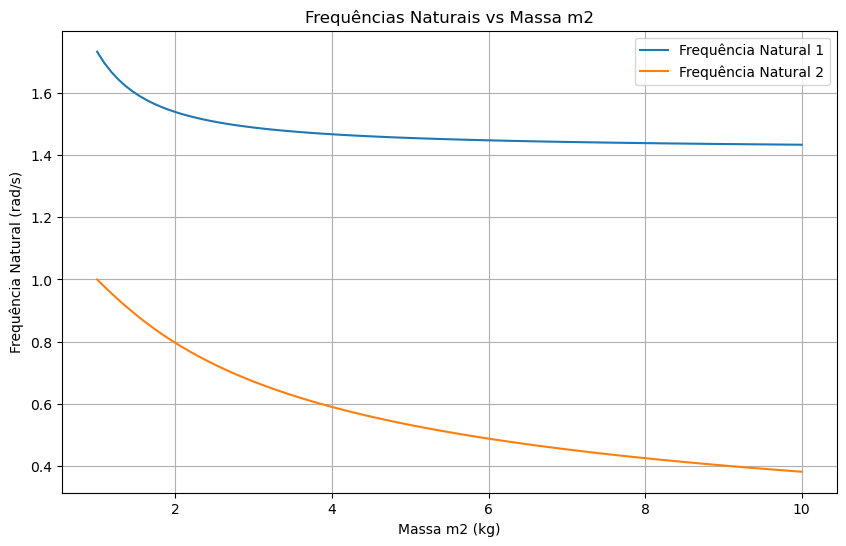

Para m2 = 5 kg:
Frequências Naturais (rad/s): [1.45482478 0.53243296]
Modos Normais (autovetores):
[[ 0.99328045  0.5033825 ]
 [-0.11573221  0.86406369]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sistema
m1 = 1  # Massa 1 (kg)
k = 1   # Constante da mola (N/m)

# Intervalo de valores para m2
m2_values = np.linspace(1, 10, 100)

# Listas para armazenar os resultados
frequencies = []
modes = []

# Função para calcular frequências naturais e modos normais
def calculate_vibration(m1, m2, k):
    # Matriz de massa
    M = np.array([[m1, 0],
                  [0, m2]])
    
    # Matriz de rigidez
    K = np.array([[2*k, -k],
                  [-k, 2*k]])
    
    # Resolver o problema de autovalores
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(M) @ K)
    
    # Frequências naturais (raiz quadrada dos autovalores)
    natural_frequencies = np.sqrt(eigenvalues)
    
    return natural_frequencies, eigenvectors

# Loop para calcular para diferentes valores de m2
for m2 in m2_values:
    freq, mode = calculate_vibration(m1, m2, k)
    frequencies.append(freq)
    modes.append(mode)

# Converter para arrays para análise
frequencies = np.array(frequencies)

# Plotar as frequências naturais
plt.figure(figsize=(10, 6))
plt.plot(m2_values, frequencies[:, 0], label="Frequência Natural 1")
plt.plot(m2_values, frequencies[:, 1], label="Frequência Natural 2")
plt.xlabel("Massa m2 (kg)")
plt.ylabel("Frequência Natural (rad/s)")
plt.title("Frequências Naturais vs Massa m2")
plt.legend()
plt.grid()
plt.show()

# Exibir modos normais para um exemplo
example_m2 = 5
freq, mode = calculate_vibration(m1, example_m2, k)
print(f"Para m2 = {example_m2} kg:")
print("Frequências Naturais (rad/s):", freq)
print("Modos Normais (autovetores):")
print(mode)

## Exercício 02
![alt text](../q2.png)

## Exercício 03
![alt text](../q3.png)

## Breve relatório (até 300 palavras) interpretando:

- A influência da simetria e variação de massas nas frequências

- A mudança nas formas dos modos normais